**Table of contents**<a id='toc0_'></a>    
- 1. [Exploratory Data Analysis - Used Cars Pricing](#toc1_)    
  - 1.1. [Objectives](#toc1_1_)    
  - 1.2. [Loading libraries and data set](#toc1_2_)    
  - 1.3. [Analyzing individual feature patterns using visualization](#toc1_3_)    
    - 1.3.1. [How to choose the right visualization method?](#toc1_3_1_)    
    - 1.3.2. [Question 1](#toc1_3_2_)    
    - 1.3.3. [Question 2](#toc1_3_3_)    
    - 1.3.4. [Continuous numerical variables](#toc1_3_4_)    
      - 1.3.4.1. [Positive linear relationship](#toc1_3_4_1_)    
      - 1.3.4.2. [Weak linear relationship](#toc1_3_4_2_)    
    - 1.3.5. [Question 3](#toc1_3_5_)    
    - 1.3.6. [Categorical variables](#toc1_3_6_)    
  - 1.4. [Descriptive Statistical analysis](#toc1_4_)    
    - 1.4.1. [Value counts](#toc1_4_1_)    
  - 1.5. [Basics of Grouping](#toc1_5_)    
    - 1.5.1. [Question 4](#toc1_5_1_)    
    - 1.5.2. [Variables: Drive Wheels and Body Style vs. Price](#toc1_5_2_)    
  - 1.6. [Correlation and Causation](#toc1_6_)    
    - 1.6.1. [Pearson Correlation](#toc1_6_1_)    
    - 1.6.2. [P-value](#toc1_6_2_)    
    - 1.6.3. [Wheel-Base vs. Price](#toc1_6_3_)    
      - 1.6.3.1. [Conclusion](#toc1_6_3_1_)    
    - 1.6.4. [Horsepower vs. Price](#toc1_6_4_)    
      - 1.6.4.1. [Conclusion](#toc1_6_4_1_)    
    - 1.6.5. [Length vs. Price](#toc1_6_5_)    
      - 1.6.5.1. [Conclusion](#toc1_6_5_1_)    
    - 1.6.6. [Width vs. Price](#toc1_6_6_)    
      - 1.6.6.1. [Conclusion](#toc1_6_6_1_)    
    - 1.6.7. [Curb-Weight vs. Price](#toc1_6_7_)    
      - 1.6.7.1. [Conclusion](#toc1_6_7_1_)    
    - 1.6.8. [Engine-Size vs. Price](#toc1_6_8_)    
      - 1.6.8.1. [Conclusion](#toc1_6_8_1_)    
    - 1.6.9. [Bore vs. Price](#toc1_6_9_)    
      - 1.6.9.1. [Conclusion](#toc1_6_9_1_)    
    - 1.6.10. [City-mpg vs. Price](#toc1_6_10_)    
      - 1.6.10.1. [Conclusion](#toc1_6_10_1_)    
    - 1.6.11. [Highway-mpg vs. Price](#toc1_6_11_)    
      - 1.6.11.1. [Conclusion](#toc1_6_11_1_)    
    - 1.6.12. [Conclusion: Important variables](#toc1_6_12_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# 1. <a id='toc1_'></a>[Exploratory Data Analysis - Used Cars Pricing](#toc0_)

## 1.1. <a id='toc1_1_'></a>[Objectives](#toc0_)
This lab covers the following:

* Explore features or characteristics to predict price of car
* Analyze patterns and run descriptive statistical analysis
* Group data based on identified parameters and create pivot tables
* Identify the effect of independent attributes on price of cars

## 1.2. <a id='toc1_2_'></a>[Loading libraries and data set](#toc0_)

In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Read data set and save into a dataframe
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(filepath, header=0)

In [4]:
# View the first 5 values of the dataframe
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1.3. <a id='toc1_3_'></a>[Analyzing individual feature patterns using visualization](#toc0_)

In [5]:
# Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot inside notebook
%matplotlib inline

### 1.3.1. <a id='toc1_3_1_'></a>[How to choose the right visualization method?](#toc0_)

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [6]:
# List the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


### 1.3.2. <a id='toc1_3_2_'></a>[Question 1](#toc0_)
What is the data type of the column "peak-rpm"?

In [7]:
# List the data type for the "peak-rpm" column
df['peak-rpm'].dtypes

dtype('float64')

In [8]:
# Calculate correlation between int and float variables
df.corr(numeric_only='true')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### 1.3.3. <a id='toc1_3_3_'></a>[Question 2](#toc0_)
Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower?

In [9]:
# Find the correlation between bore, stoke, compression-ratio and horsepower columns
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### 1.3.4. <a id='toc1_3_4_'></a>[Continuous numerical variables](#toc0_)

Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well.

Let's see several examples of different linear relationships:

#### 1.3.4.1. <a id='toc1_3_4_1_'></a>[Positive linear relationship](#toc0_)

(0.0, 53259.84215281876)

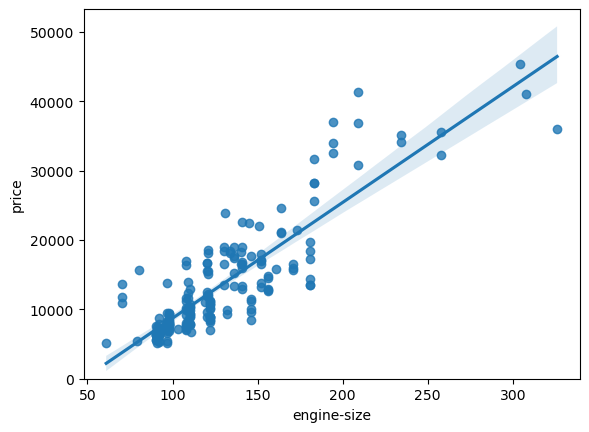

In [10]:
# Create a scatter plot of engine-size and price columns
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [11]:
# Find the correlation between engine size and price columns
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

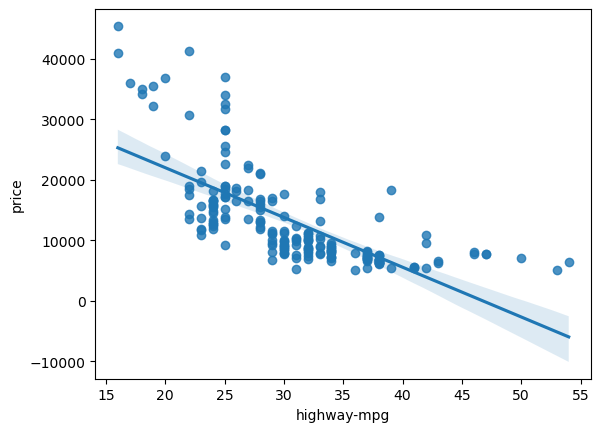

In [12]:
# Create a scatter plot of highway-mpg and price columns
sns.regplot(x="highway-mpg", y="price", data=df)

In [13]:
# Find the correlation between highway-mpg and price columns
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### 1.3.4.2. <a id='toc1_3_4_2_'></a>[Weak linear relationship](#toc0_)

<Axes: xlabel='peak-rpm', ylabel='price'>

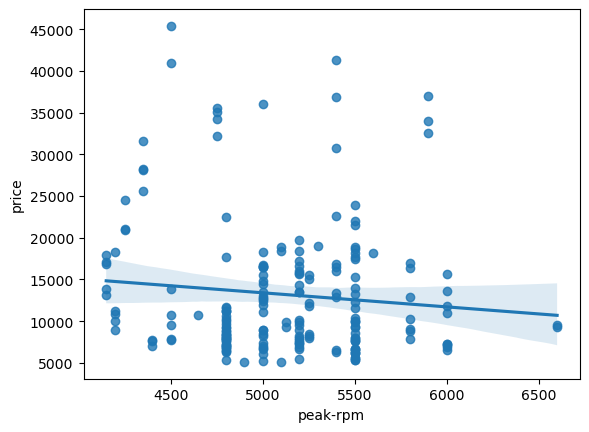

In [14]:
# Create a scatter plot of peak-rpm and price columns
sns.regplot(x="peak-rpm", y="price", data=df)

In [15]:
# Find the correlation between peak-rpm and price columns
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### 1.3.5. <a id='toc1_3_5_'></a>[Question 3](#toc0_)
a.) Find the correlation between x="stroke" and y="price"?

In [16]:
# Find the correlation between stroke and price columns
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


b.) Given the correlation results between "price" and "stroke", do you expect a linear relationship?
Verify your results using the function "regplot()".

(0.0, 47414.1)

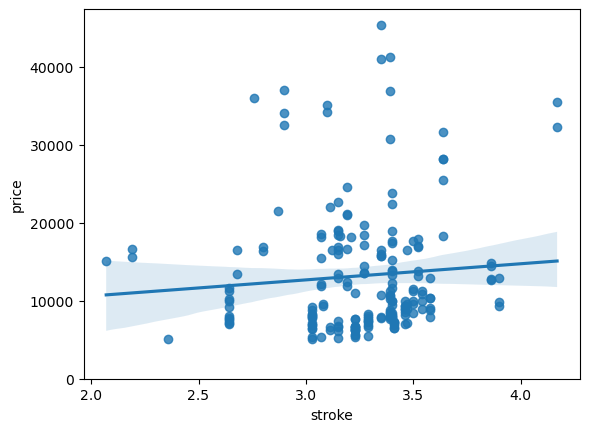

In [17]:
# There is a weak correlation between price and stroke. We can create a scatter plot of stroke and price columns to demonstrate this
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

### 1.3.6. <a id='toc1_3_6_'></a>[Categorical variables](#toc0_)

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

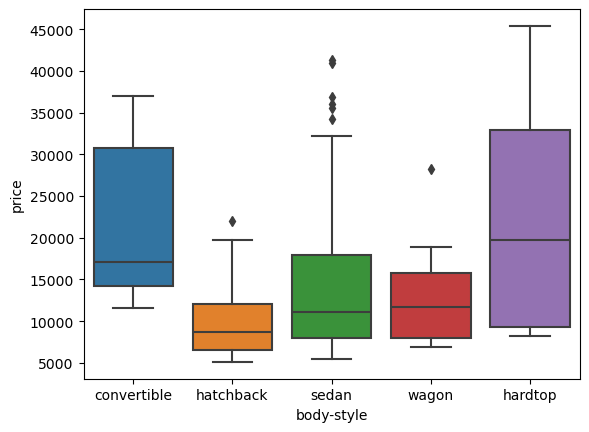

In [18]:
# Create a box plot to look at the relationship between body-style and price
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-location', ylabel='price'>

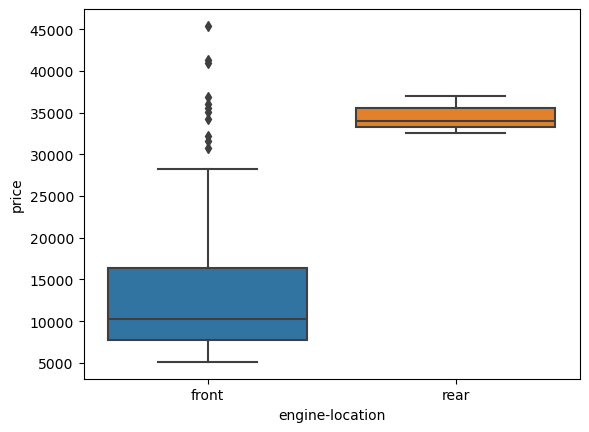

In [19]:
# Create a box plot to look at the relationship between engine-location and price
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

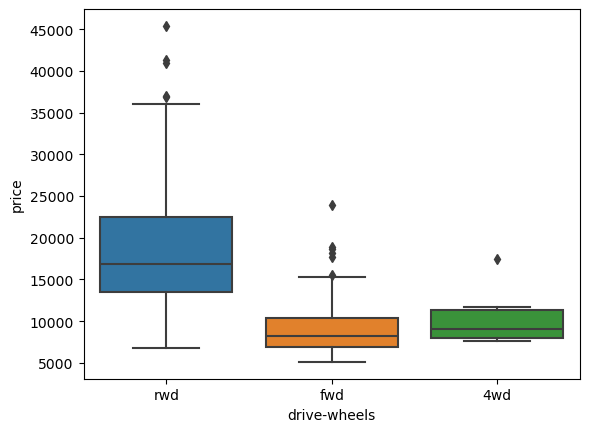

In [20]:
# Create a box plot to look at the relationship between drive-wheels and price
sns.boxplot(x="drive-wheels", y="price", data=df)

## 1.4. <a id='toc1_4_'></a>[Descriptive Statistical analysis](#toc0_)

Let's first take a look at the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

* the count of that variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

In [21]:
# View basis statistics for all continuous variables
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [22]:
# View basic statistics for object variables
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


### 1.4.1. <a id='toc1_4_1_'></a>[Value counts](#toc0_)

Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [23]:
# View count of drive-wheels variable
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [24]:
# Convert value count to dataframe
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [25]:
# Save results to dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
# Rename column to value_counts
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
# View variable
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [26]:
# Rename index to drive-wheels
drive_wheels_counts.index.name = 'drive-wheels'
# View variable
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [27]:
# Repeat the same steps for engine-location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


## 1.5. <a id='toc1_5_'></a>[Basics of Grouping](#toc0_)

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual group.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [28]:
# Find unique categories
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
# Create variable based on categories
df_group_one = df[['drive-wheels','body-style','price']]

In [30]:
# Group results and find mean price per category of drive wheels
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean(numeric_only=True)
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [31]:
# Group by multiple variables
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [32]:
# Create pivot table to more easily view this with drive-wheels being the rows and body-style being the columns
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [33]:
# Fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### 1.5.1. <a id='toc1_5_1_'></a>[Question 4](#toc0_)
Use the "groupby" function to find the average "price" of each car based on "body-style"?

In [34]:
# Group and find the average price of each body-style type
df_group_two = df[['body-style','price']]
df_group_two = df_group_two.groupby(['body-style'],as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### 1.5.2. <a id='toc1_5_2_'></a>[Variables: Drive Wheels and Body Style vs. Price](#toc0_)

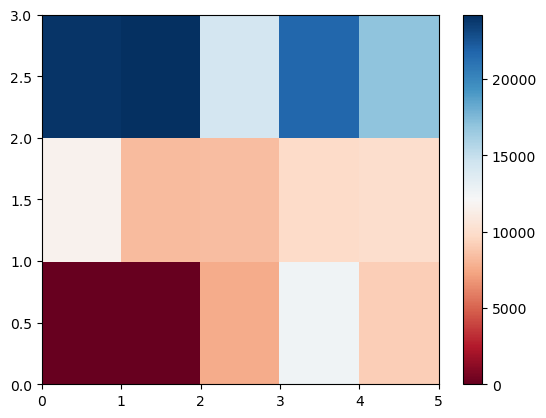

In [35]:
# Create a default heat map to visualize the relationship between body-style and price
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

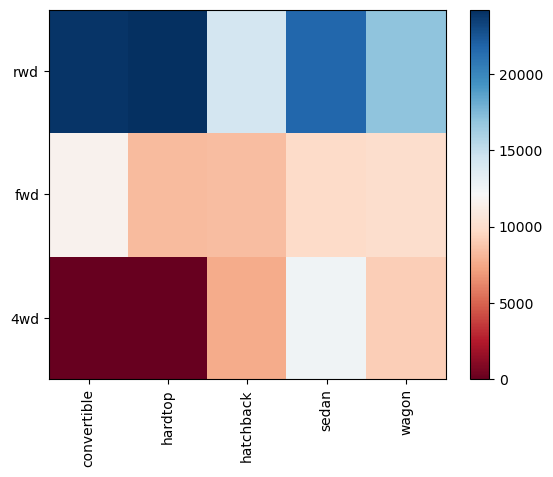

In [36]:
# Make visual improvements to heat map
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Define label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 1.6. <a id='toc1_6_'></a>[Correlation and Causation](#toc0_)
<strong>Correlation:</strong> a measure of the extent of interdependence between variables.

<strong>Causation:</strong> the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.


### 1.6.1. <a id='toc1_6_1_'></a>[Pearson Correlation](#toc0_)

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

* 1: Perfect positive linear correlation.
* 0: No linear correlation, the two variables most likely do not affect each other.
* -1: Perfect negative linear correlation.

Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [37]:
# Calculate the Pearson Correlation of the int and float variables
df.corr(numeric_only='true')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


### 1.6.2. <a id='toc1_6_2_'></a>[P-value](#toc0_)

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the p-value is:
* 0.001: we say there is strong evidence that the correlation is significant.
* 0.05: there is moderate evidence that the correlation is significant.
* 0.1: there is weak evidence that the correlation is significant.
* 0.1: there is no evidence that the correlation is significant.

In [38]:
# Import stats from the scipy library
from scipy import stats

### 1.6.3. <a id='toc1_6_3_'></a>[Wheel-Base vs. Price](#toc0_)

In [39]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5846418222655085  with a P-value of P = 8.076488270732338e-20


#### 1.6.3.1. <a id='toc1_6_3_1_'></a>[Conclusion](#toc0_)
Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

### 1.6.4. <a id='toc1_6_4_'></a>[Horsepower vs. Price](#toc0_)

In [40]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8095745670036555  with a P-value of P = 6.369057428260921e-48


#### 1.6.4.1. <a id='toc1_6_4_1_'></a>[Conclusion](#toc0_)
Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

### 1.6.5. <a id='toc1_6_5_'></a>[Length vs. Price](#toc0_)

In [41]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of P = 8.016477466158386e-30


#### 1.6.5.1. <a id='toc1_6_5_1_'></a>[Conclusion](#toc0_)
Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

### 1.6.6. <a id='toc1_6_6_'></a>[Width vs. Price](#toc0_)

In [42]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7512653440522666  with a P-value of P = 9.200335510483504e-38


#### 1.6.6.1. <a id='toc1_6_6_1_'></a>[Conclusion](#toc0_)
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### 1.6.7. <a id='toc1_6_7_'></a>[Curb-Weight vs. Price](#toc0_)

In [43]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.834414525770285  with a P-value of P = 2.189577238893392e-53


#### 1.6.7.1. <a id='toc1_6_7_1_'></a>[Conclusion](#toc0_)
Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

### 1.6.8. <a id='toc1_6_8_'></a>[Engine-Size vs. Price](#toc0_)

In [44]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455186  with a P-value of P = 9.26549162219736e-64


#### 1.6.8.1. <a id='toc1_6_8_1_'></a>[Conclusion](#toc0_)
Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

### 1.6.9. <a id='toc1_6_9_'></a>[Bore vs. Price](#toc0_)

In [45]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5431553832626603  with a P-value of P = 8.049189483935318e-17


#### 1.6.9.1. <a id='toc1_6_9_1_'></a>[Conclusion](#toc0_)
Since the p-value is 
 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

### 1.6.10. <a id='toc1_6_10_'></a>[City-mpg vs. Price](#toc0_)

In [46]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844684  with a P-value of P = 2.3211320655672357e-29


#### 1.6.10.1. <a id='toc1_6_10_1_'></a>[Conclusion](#toc0_)
Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

### 1.6.11. <a id='toc1_6_11_'></a>[Highway-mpg vs. Price](#toc0_)

In [47]:
# Calculate the Pearson Correleation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P = 1.7495471144474797e-31


#### 1.6.11.1. <a id='toc1_6_11_1_'></a>[Conclusion](#toc0_)
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

### 1.6.12. <a id='toc1_6_12_'></a>[Conclusion: Important variables](#toc0_)

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

Categorical variables:
* Drive-wheels

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.